<a href="https://colab.research.google.com/github/AshrafTasin/CSE-366--Communication-Engineering-Lab/blob/main/task02/lineCoding_blockCoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Name : Syed Ashraf Al Tasin
##Reg : 2017331014
###Task 02

#Importing Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def check_data(data):
    
    for i in range(len(data)):
        if(data[i]!='0' and data[i]!='1'):
            return 1

#Unipolar NRZ


Input Binary Data Stream : 0100101


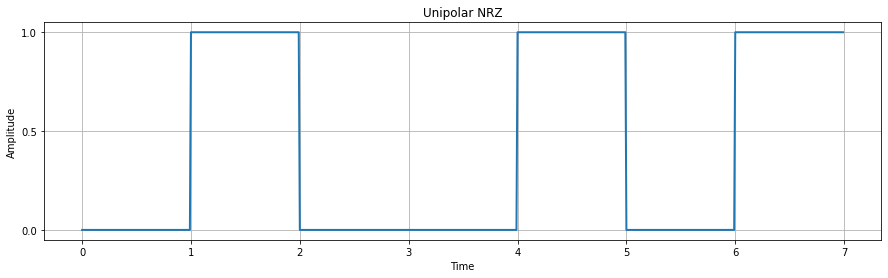

In [3]:
def uniNRZ(data):

    x=np.arange(0, len(data), 0.01)
    y=np.empty(0)

    for bit in data:
        if bit=='0':
            y=np.concatenate((y, np.zeros(100)))
        elif bit=='1':
            y=np.concatenate((y, np.ones(100)))
            
    return x,y

def plot_UNRZ(data):

    x,y=uniNRZ(data)
    plt.figure(figsize=(15, 4))
    plt.plot(x,y,linewidth=2)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Unipolar NRZ')
    plt.yticks([0,0.5,1])
    plt.grid('on')
    plt.show()


data=input("Input Binary Data Stream : ")

if(check_data(data)==1):
    print("Please Enter Valid Binary Data Stream!")
else:
    plot_UNRZ(data)

#Polar NRZ-L & NRZ-I

In Polar NRZ-L scheme, we assume bit 0 is represented by a positive voltage and bit 1 is represented by a negative voltage.

And in Polar NRZ-I scheme, we assume that the last voltage level was positive. It is required as the change or lack of change in the level of the voltage determines the value of the bit in this scheme. If there is no change, the bit is 0; if there is a change, the bit is 1.

Input Binary Data Stream : 01001110


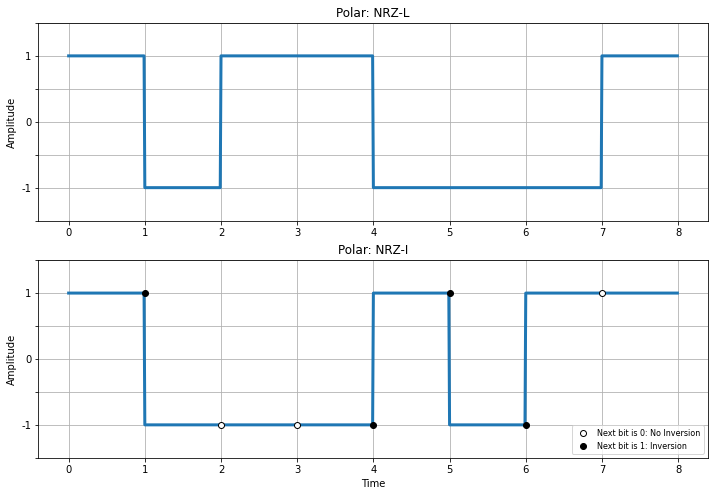

In [4]:
def polar_NRZL(data):
    
    x=np.arange(0, len(data), 0.01)
    y=np.empty(0)

    for bit in data:
        if bit=="0":
                y=np.concatenate((y, np.ones(100)*1))
        elif bit=="1":
                y=np.concatenate((y, np.ones(100)*-1))
    
    return x,y


def polar_NRZI(data, prevbit):

    x=np.arange(0, len(data), 0.01)
    y=np.empty(0)

    no_inversion=[]
    no_inversion_0=[]
    inversion=[]
    inversion_1=[]

    encoded=[] 

    for bit in data:
        if bit=="0":
            y=np.concatenate((y, np.ones(100)*prevbit))
            encoded.append(prevbit)
        elif bit=="1":
            if prevbit==1:
                y=np.concatenate((y, np.zeros(100)-1))
                encoded.append(-1)
                prevbit=-1
            else:
                y=np.concatenate((y, np.ones(100)))
                encoded.append(1)
                prevbit=1

    for i in range(0,len(data)-1): 
        if encoded[i] == encoded[i+1]:
            no_inversion.append(encoded[i])
            no_inversion_0.append(i+1)
        else:
            inversion.append(encoded[i])
            inversion_1.append(i+1)

    return x, y, no_inversion_0, no_inversion, inversion_1, inversion



def plot_PNRZ(data, startbit):

    fig, axs = plt.subplots(2, figsize=(12,8))
    x, y=polar_NRZL(data)
    axs[0].plot(x, y, linewidth=3)
    axs[0].set_title('Polar: NRZ-L')
    axs[0].set(ylabel='Amplitude', title='Polar: NRZ-L')
    axs[0].set_xticks([x for x in range(len(data)+1)])
    axs[0].set_yticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5])
    axs[0].set_yticklabels(['', '-1', '', '0', '', '1', ''])
    axs[0].grid()


    x, y, no_inversion_0, no_inversion, inversion_1, inversion = polar_NRZI(data, startbit)
    axs[1].plot(x, y, linewidth=3)
    p1,=axs[1].plot(no_inversion_0, no_inversion, 'o', markeredgecolor="black", markerfacecolor="white", markersize=6, label="Next bit is 0: No Inversion")
    p2,=axs[1].plot(inversion_1, inversion, 'ok', markersize=6, label="Next bit is 1: Inversion")
    axs[1].legend(loc='lower right', prop={'size': 8.0})
    axs[1].set_title('Polar: NRZ-I')
    axs[1].set(xlabel='Time', ylabel='Amplitude', title='Polar: NRZ-I')
    axs[1].set_xticks([x for x in range(len(data)+1)])
    axs[1].set_yticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5])
    axs[1].set_yticklabels(['', '-1', '', '0', '', '1', ''])
    axs[1].grid()
    plt.show()

data=input("Input Binary Data Stream : ")

if(check_data(data)==1):
    print("Please Enter Valid Binary Data Stream!")
else:
    plot_PNRZ(data,1)

#Polar RZ

Input Binary Data Stream : 010011101


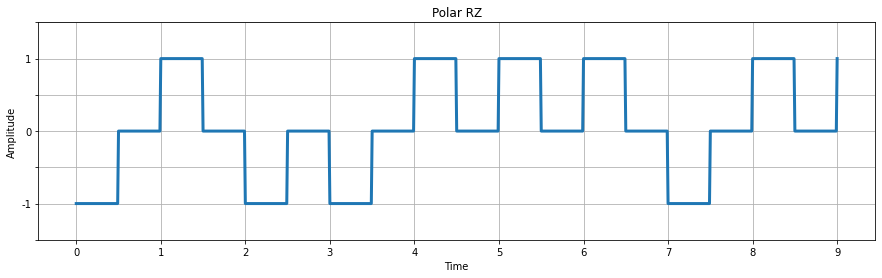

In [5]:
def polar_RZ(data):
    x=np.arange(0, len(data)+0.01, 0.01)
    y=np.empty(0)

    for bit in data:
        if bit=="0":
            y=np.concatenate((y, np.zeros(50)-1))
        elif bit=="1":
            y=np.concatenate((y, np.ones(50)))
        y=np.concatenate((y, np.zeros(50)))
    y=np.concatenate((y, np.array([1])))
    
    return x,y

def plot_PRZ(data):
    fig, axs = plt.subplots(figsize=(15, 4))
    x, y = polar_RZ(data)
    axs.plot(x, y, linewidth=3)
    axs.set_title('Polar RZ')
    axs.set(xlabel='Time', ylabel='Amplitude', title='Polar RZ')
    axs.set_xticks([x for x in range(len(data)+1)])
    axs.set_yticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5])
    axs.set_yticklabels(['', '-1', '', '0', '', '1', ''])
    axs.grid()
    plt.show()

data=input("Input Binary Data Stream : ")

if(check_data(data)==1):
    print("Please Enter Valid Binary Data Stream!")
else:
    plot_PRZ(data)


#Bi Polar

Input Binary Data Stream : 010011101


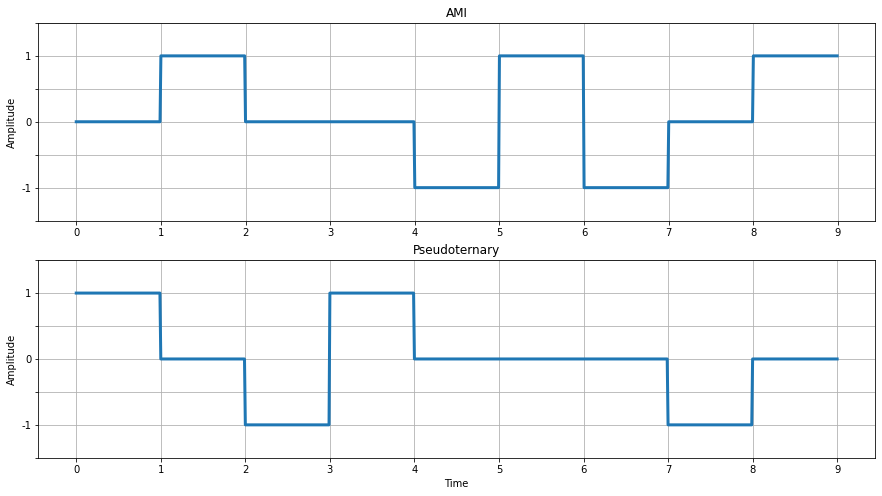

In [6]:
def AMI(data):
   
    x=np.arange(0, len(data), 0.01)
    y=np.empty(0)

    previous=-1

    for bit in data:
        if bit=="0":
            y=np.concatenate((y, np.zeros(100)))
        else:
            if previous==1:
                y=np.concatenate((y, np.zeros(100)-1))
                previous=-1
            else:
                y=np.concatenate((y, np.ones(100)))
                previous = 1
    return x,y

def Pseudoternary(data):
    
    x=np.arange(0, len(data)+0.01, 0.01)
    y=np.empty(0)

    previous=-1

    for bit in data:
        if bit=="0":
            if previous==1:
                y=np.concatenate((y, np.zeros(100)-1))
                previous=-1
            else:
                y=np.concatenate((y, np.ones(100)))
                previous=1
        else:
            y=np.concatenate((y, np.zeros(100)))

    y=np.concatenate((y, np.array([0])))

    return x,y

def plot_Bipolar(bits):
    fig, axs = plt.subplots(2, figsize=(15, 8))
    x, y = AMI(bits)
    axs[0].plot(x, y, linewidth=3)
    axs[0].set(ylabel='Amplitude', title='AMI')
    axs[0].set_xticks([x for x in range(len(bits)+1)])
    axs[0].set_yticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5])
    axs[0].set_yticklabels(['', '-1', '', '0', '', '1', ''])
    axs[0].grid()
    
    x, y=Pseudoternary(bits)
    axs[1].plot(x, y, linewidth=3)
    axs[1].set(xlabel='Time', ylabel='Amplitude', title='Pseudoternary')
    axs[1].set_xticks([x for x in range(len(bits)+1)])
    axs[1].set_yticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5])
    axs[1].set_yticklabels(['', '-1', '', '0', '', '1', ''])
    axs[1].grid()
    plt.show()

data=input("Input Binary Data Stream : ")

if(check_data(data)==1):
    print("Please Enter Valid Binary Data Stream!")
else:
    plot_Bipolar(data)

#Block Coding

##4B/5B

Enter Data Sequence : 100011110000Q
Data Sequence : 1000 - Corresponding 5B value : 10010
Data Sequence : 1111 - Corresponding 5B value : 11101
Data Sequence : 0000 - Corresponding 5B value : 11110
Control Sequence Q - Corresponding 5B value : 00000

The Final Result in 5B : 10010111011111000000



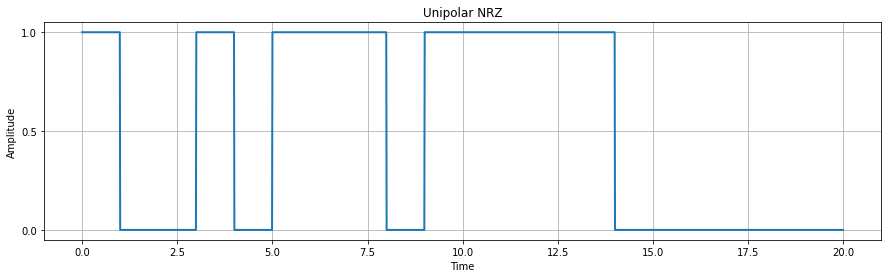

In [7]:
conversion = {'0000': '11110', 
              '0001': '01001',
              '0010': '10100', 
              '0011': '10101',
              '0100': '01010', 
              '0101': '01011',
              '0110': '01110', 
              '0111': '01111',
              '1000': '10010', 
              '1001': '10011',
              '1010': '10110', 
              '1011': '10111',
              '1100': '11010', 
              '1101': '11011',
              '1110': '11100', 
              '1111': '11101',
              'Q': '00000', 
              'I': '11111',
              'H': '00100', 
              'J': '11000',
              'K': '10001', 
              'T': '01101',
              'S': '11001', 
              'R': '00111',
            }

def check_status(seq):
    valid=['Q','I','S','J','K','T','R','H']

    i=len(seq)
    j=0
    temp=[]
   
    while j<i:
        temp_str=""
        flag=0

        for l in range(0,4):
            if j+l >= i:
                break
            if seq[j+l]!='0' and seq[j+l]!='1' and seq[j+l] not in valid:
                return "Sorry! The String must include binary numbers (0/1) or valid control sequence only. Valid Control Sequences are : Q,I,S,J,K,T,R,H"
            if seq[j+l] in valid:
                if(len(temp_str) > 0):
                    return "Invalid Sequence"
                temp.append(seq[j+l])
                flag=1
                j=j+l+1
                break
            temp_str+=seq[j+l]

        if flag==0 :
            j=j+4
            if len(temp_str)!=4:
                return "Invalid Sequence"
            temp.append(temp_str)
            
    
    for i in temp:
        if len(i)!=1 and len(i)!=4:
            return "Invalid Sequence"
    
    result=""

    for i in temp:
        result+=conversion[i]
        if(len(i)==1):
             print("Control Sequence "+i+" - Corresponding 5B value : "+conversion[i])
        else:
             print("Data Sequence : "+i+" - Corresponding 5B value : "+conversion[i])
    
    print("\nThe Final Result in 5B : "+result+"\n")
    return result

n=input("Enter Data Sequence : ")
result=check_status(n)

plot_UNRZ(result)
